In [35]:
import pandas as pd
import numpy as np

df = pd.read_csv("creditDefault.csv")

In [36]:
targetName = "default payment next month"
df.columns.get_loc(targetName)

featureNames = df.columns[np.where(df.columns != targetName)]

X= df[featureNames].values
y=df[targetName].values.ravel()

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(n_estimators=50, random_state=1)

random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [40]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=50, random_state=1)

ada_boost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [41]:
from sklearn.model_selection import cross_val_score

tree_cv_score = cross_val_score(tree_clf, X_train, y_train, cv=5)

random_forest_score = cross_val_score(random_forest_clf, X_train, y_train, cv=5)

ada_boost_score = cross_val_score(ada_boost_clf, X_train, y_train, cv=5)

print(tree_cv_score)
print(random_forest_score)
print(ada_boost_score)

print("Mean of Tree cv score: {}".format(np.mean(tree_cv_score)))
print("Mean of Random Forest cv score: {}".format(np.mean(random_forest_score)))
print("Mean of Ada Boost cv score: {}".format(np.mean(ada_boost_score)))

[0.71833333 0.735      0.725625   0.73104167 0.72854167]
[0.81083333 0.82354167 0.81791667 0.81791667 0.81291667]
[0.815      0.82333333 0.814375   0.81375    0.81729167]
Mean of Tree cv score: 0.7277083333333333
Mean of Random Forest cv score: 0.8166249999999999
Mean of Ada Boost cv score: 0.8167500000000001


In [45]:
y_pred_tree = tree_clf.predict(X_test)
y_pred_random = random_forest_clf.predict(X_test)
y_pred_ada = ada_boost_clf.predict(X_test)

In [50]:
from sklearn import metrics 

print("Tree Accuracy score: {}".format(metrics.accuracy_score(y_test, y_pred_tree)))
print("Random Forest Score: {}".format(metrics.accuracy_score(y_test, y_pred_random)))
print("Ada Boost Score: {}".format(metrics.accuracy_score(y_test, y_pred_ada)))

Tree Accuracy score: 0.725
Random Forest Score: 0.8128333333333333
Ada Boost Score: 0.816


[Text(167.4, 163.07999999999998, 'X[6] <= 1.5\ngini = 0.345\nsamples = 24000\nvalue = [0.778, 0.222]'),
 Text(83.7, 54.360000000000014, 'gini = 0.277\nsamples = 21477\nvalue = [0.746, 0.148]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.422\nsamples = 2523\nvalue = [0.032, 0.073]')]

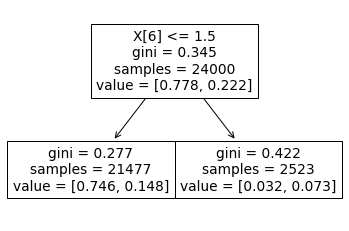

In [53]:
tree.plot_tree(ada_boost_clf.estimators_[0])

In [54]:
ada_boost_clf.feature_importances_

array([0.  , 0.06, 0.02, 0.02, 0.04, 0.04, 0.14, 0.06, 0.02, 0.02, 0.02,
       0.02, 0.12, 0.04, 0.1 , 0.04, 0.  , 0.02, 0.04, 0.06, 0.06, 0.02,
       0.  , 0.04])